# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
import numpy as np
import pandas as pd

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents

In [2]:
# Run this code:
salaries = pd.read_csv('../Current_Employee_Names__Salaries__and_Position_Titles.csv')

In [3]:
salaries.columns=salaries.columns.str.replace(' ', '_')
salaries.columns=salaries.columns.str.replace('-', '_')

Examine the `salaries` dataset using the `head` function below.

In [4]:
salaries.head()

,Name,Job_Titles,Department,Full_or_Part_Time,Salary_or_Hourly,Typical_Hours,Annual_Salary,Hourly_Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [5]:
salaries.isna().sum()

Name                     0
Job_Titles               0
Department               0
Full_or_Part_Time        0
Salary_or_Hourly         0
Typical_Hours        25161
Annual_Salary         8022
Hourly_Rate          25161
dtype: int64

Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [6]:
salaries['Full_or_Part_Time'].value_counts()

F    31090
P     2093
Name: Full_or_Part_Time, dtype: int64

What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [7]:
salaries['Department'].value_counts()

POLICE                   13414
FIRE                      4641
STREETS & SAN             2198
OEMC                      2102
WATER MGMNT               1879
AVIATION                  1629
TRANSPORTN                1140
PUBLIC LIBRARY            1015
GENERAL SERVICES           980
FAMILY & SUPPORT           615
FINANCE                    560
HEALTH                     488
CITY COUNCIL               411
LAW                        407
BUILDINGS                  269
COMMUNITY DEVELOPMENT      207
BUSINESS AFFAIRS           171
COPA                       116
BOARD OF ELECTION          107
DoIT                        99
PROCUREMENT                 92
INSPECTOR GEN               87
MAYOR'S OFFICE              85
CITY CLERK                  84
ANIMAL CONTRL               81
HUMAN RESOURCES             79
CULTURAL AFFAIRS            65
BUDGET & MGMT               46
ADMIN HEARNG                39
DISABILITIES                28
TREASURER                   22
HUMAN RELATIONS             16
BOARD OF

# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [8]:
from scipy.stats import t
from scipy.stats import ttest_1samp

In [9]:
part_time = salaries[salaries['Full_or_Part_Time']=='P']
part_time.head()

,Name,Job_Titles,Department,Full_or_Part_Time,Salary_or_Hourly,Typical_Hours,Annual_Salary,Hourly_Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
26,"ABIOYE, ADEWOLE A",LIBRARY ASSOCIATE - HOURLY,PUBLIC LIBRARY,P,Hourly,20.0,NaN,25.10
90,"ACHA, SHARAZAN MARLENE",POOL MOTOR TRUCK DRIVER,STREETS & SAN,P,Hourly,10.0,NaN,28.48


In [11]:
media_horas = part_time.Hourly_Rate.mean()
media_horas

17.191922525107845

In [12]:
part_time_2 = part_time['Hourly_Rate'].dropna().tolist()

In [13]:
t_test = ttest_1samp(part_time_2, 30, alternative='two-sided')
t_test

Ttest_1sampResult(statistic=-87.09790442396911, pvalue=0.0)

In [14]:
# Como el p-valor (0.0) es menor al intervalo de confianza diremos que 
# hay evidencia significativa para demostrar que el salario por hora es diferente de 30$/hora

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [15]:
police = salaries[salaries['Department']=='POLICE']
police.head()

,Name,Job_Titles,Department,Full_or_Part_Time,Salary_or_Hourly,Typical_Hours,Annual_Salary,Hourly_Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN


In [16]:
media_sueldo = police.Annual_Salary.mean()
media_sueldo

86486.41450313339

In [17]:
police.Annual_Salary.isna().sum()

10

In [18]:
police_ok = police['Annual_Salary'].dropna().tolist()

In [19]:
t_test_police = ttest_1samp(police_ok, 86000, alternative='greater')
t_test_police

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0010301701775482569)

In [20]:
# pvalor= 0.002
# alfa = 0.05       
# Rechazamos hipótesis nula. El resultado es estadísticamente significativo, por lo que, 
# este año, los sueldos son más altos que la media del año pasado

Using the `crosstab` function, find the department that has the most hourly workers. 

In [21]:
contin_table=pd.crosstab(part_time.Department, part_time['Typical_Hours'])

contin_table

Typical_Hours,10.0,20.0,35.0,40.0
Department,,,,
ANIMAL CONTRL,1,18,0,0
AVIATION,0,18,0,0
BUSINESS AFFAIRS,0,7,0,0
CITY COUNCIL,7,35,6,1
COMMUNITY DEVELOPMENT,0,3,0,0
FAMILY & SUPPORT,0,286,0,0
FINANCE,0,2,0,0
HUMAN RESOURCES,0,2,2,0
LAW,0,1,0,0


The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [22]:
dpto = part_time[part_time['Department']=='OEMC']
dpto.head()

,Name,Job_Titles,Department,Full_or_Part_Time,Salary_or_Hourly,Typical_Hours,Annual_Salary,Hourly_Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
95,"ACKLIN, QIANA D",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
157,"ADAMS, ROSITA",CROSSING GUARD - PER CBA,OEMC,P,Hourly,20.0,NaN,15.94
183,"ADEWOLE, SAHEED",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [23]:
dpto_ok = dpto['Hourly_Rate'].dropna().tolist()

In [24]:
t_test_dpto = ttest_1samp(dpto_ok, 35)
t_test_dpto

Ttest_1sampResult(statistic=-237.7457031601366, pvalue=0.0)

In [25]:
# Con el intervalo de confianza de 0.05 rechazamos H0. El resultado es estadísticamente significativo y
# el sueldo del dpto OEMC por hora es menor a 35$/hora.

# Challenge 3 - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

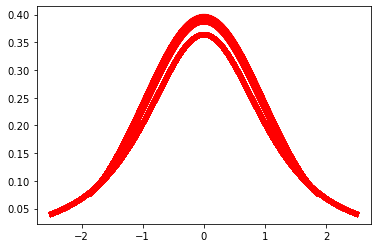

In [26]:
from scipy.stats import t
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = t.stats(part_time_2, moments='mvsk')
x = np.linspace(t.ppf(0.05, part_time_2),
                    t.ppf(0.95, part_time_2), 100)
ax.plot(x, t.pdf(x, part_time_2),
        'r-', lw=5, alpha=0.6, label='t pdf');

In [27]:
# Calculamos los numeros que necesitamos para intervalos de confianza:
m = part_time.Hourly_Rate.mean()
s = part_time.Hourly_Rate.std()

dof = len(part_time.Hourly_Rate)-1
confidence = 0.95

In [28]:
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
t_crit

1.9610986026094561

In [29]:
(m-s*t_crit/np.sqrt(len(x)), m+s*t_crit/np.sqrt(len(x)))

(15.873202240553512, 18.51064280966218)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

# Challenge 4 - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [30]:
import numpy as np

In [31]:
from statsmodels.stats.proportion import proportions_ztest

In [32]:
part_time.Hourly_Rate.count()

2091

In [34]:
count = 
nobs = 2091
value = 0.25
stat, pval = proportions_ztest(count, nobs, value)
print('{0:0.3f}'.format(pval))


0.000
